In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

In [2]:
df=pd.read_csv("C:/Users/sanja/Downloads/Forests.csv")

In [3]:
col=df.columns
col

Index(['class', 'b1', 'b2', 'b3', 'b4', 'b5', 'b6', 'b7', 'b8', 'b9'], dtype='object')

In [4]:
df

,class,b1,b2,b3,b4,b5,b6,b7,b8,b9
0,d,39,36,57,91,59,101,93,27,60
1,h,84,30,57,112,51,98,92,26,62
2,s,53,25,49,99,51,93,84,26,58
3,s,59,26,49,103,47,92,82,25,56
4,d,57,49,66,103,64,106,114,28,59
...,...,...,...,...,...,...,...,...,...,...
518,o,55,56,72,91,79,113,86,35,68
519,d,69,49,76,91,52,91,92,25,57
520,s,49,26,48,107,59,104,62,22,53
521,s,55,26,52,92,55,98,65,23,56


# A

In [5]:
#color division, partition and visualization
def data_partition(df):
    color={'d':'red','h':'blue','o':'yellow','s':'green'}
    
    #partition 
    forest_d=df[df['class']=='d']
    forest_h=df[df['class']=='h']
    forest_o=df[df['class']=='o']
    forest_s=df[df['class']=='s']

    combinations=[]
    for i in range(1,10):
        for j in range(1,10):
            if(i!=j):
                if([j,i] not in combinations):
                    combinations.append([i,j])
                       
    return color,combinations,forest_d,forest_h,forest_o,forest_s

C:\Users\sanja\AppData\Local\Temp\ipykernel_14868\84454186.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(5,5))


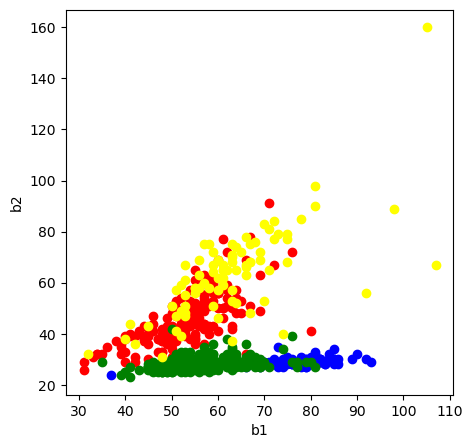

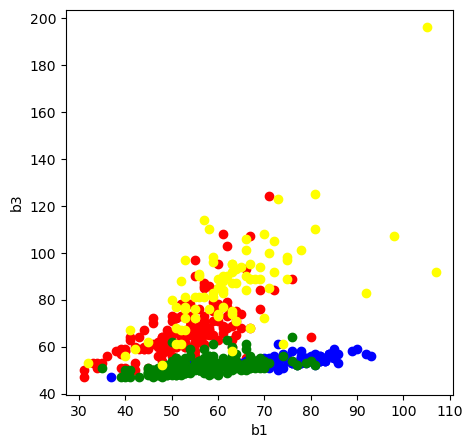

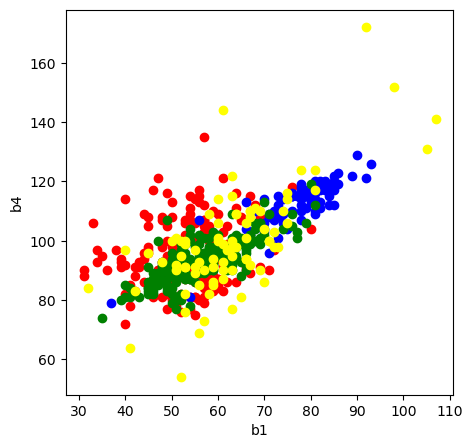

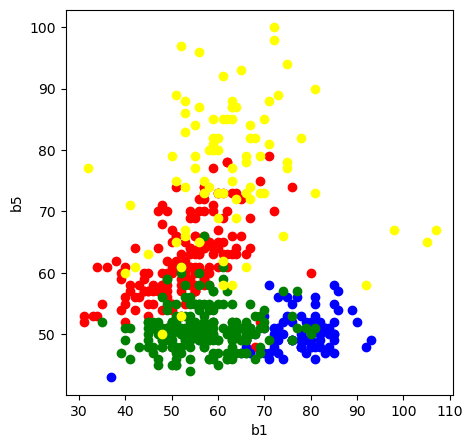

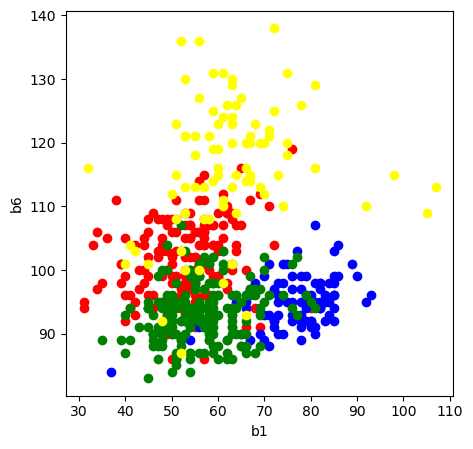

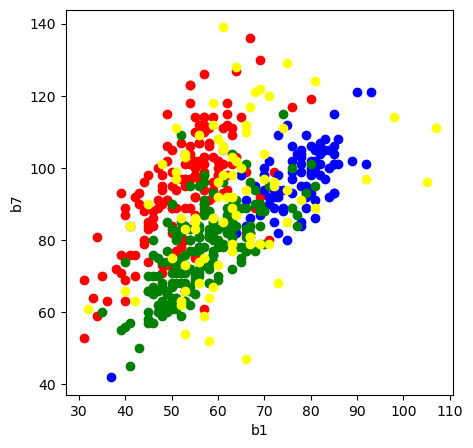

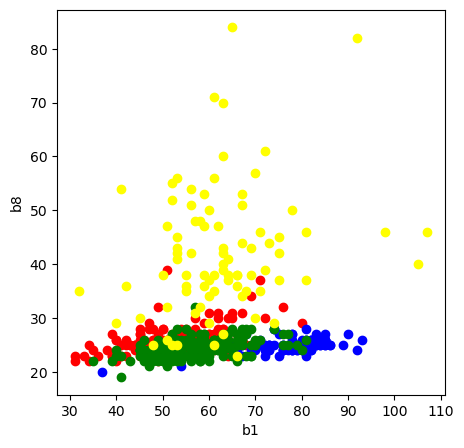

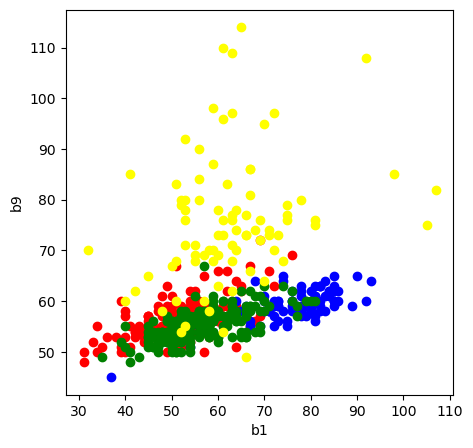

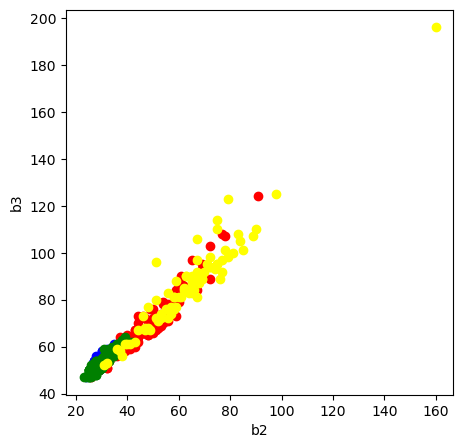

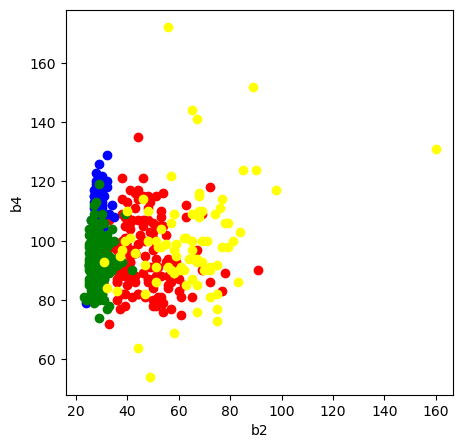

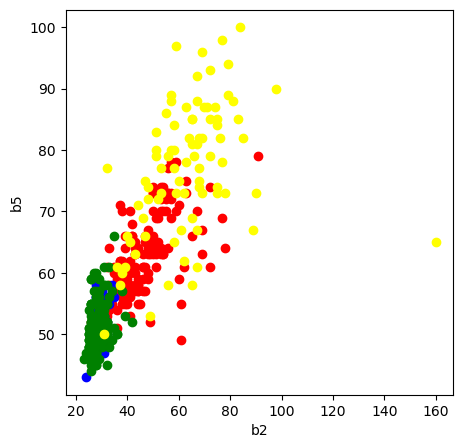

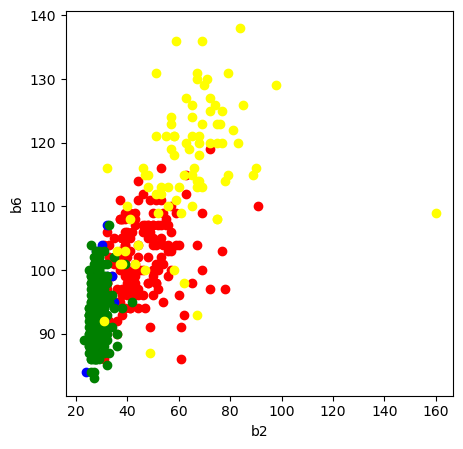

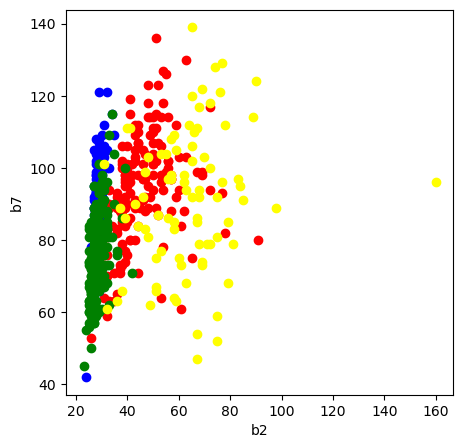

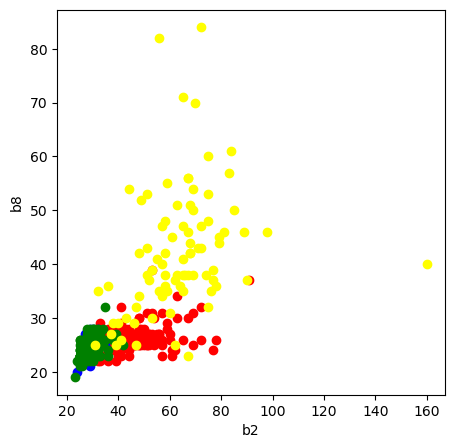

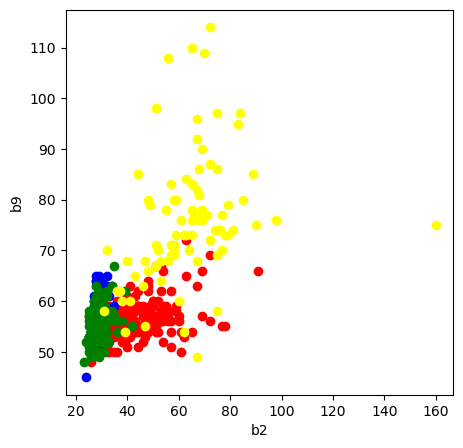

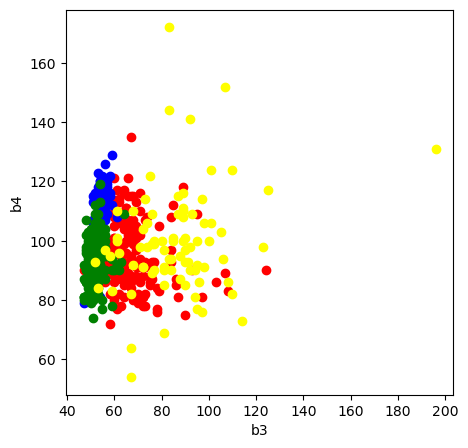

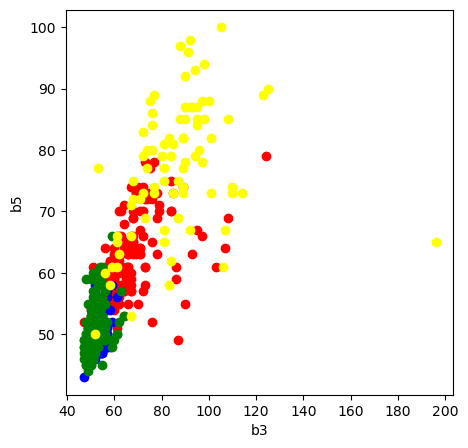

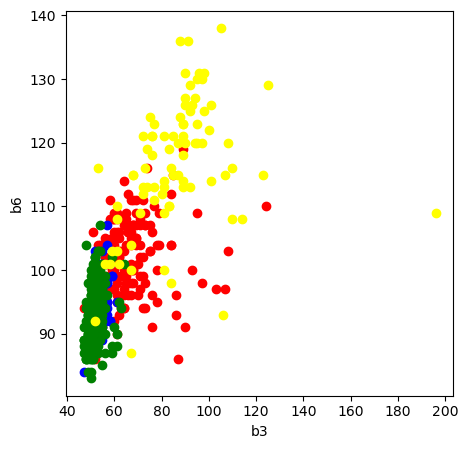

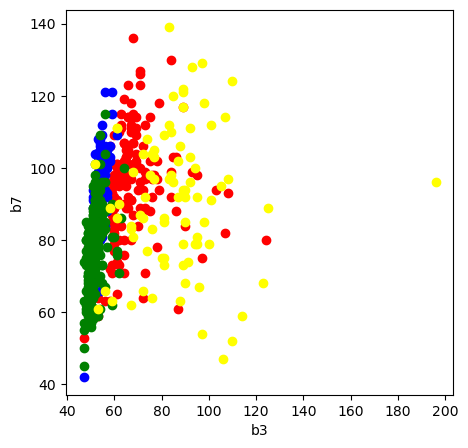

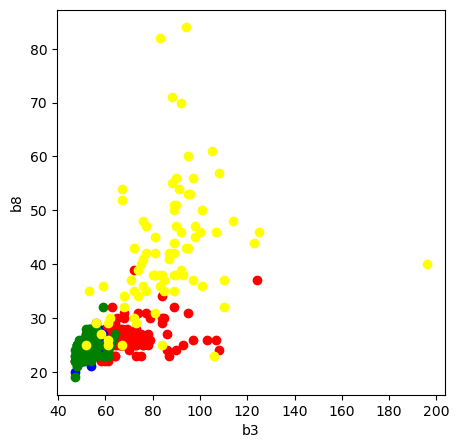

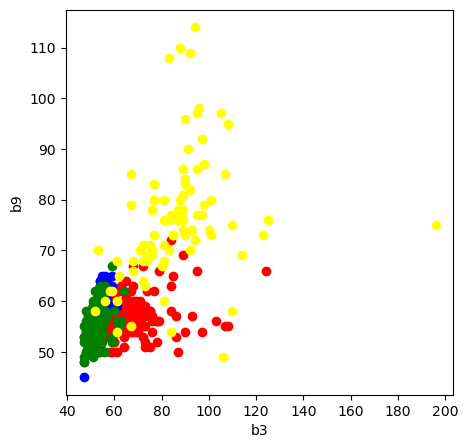

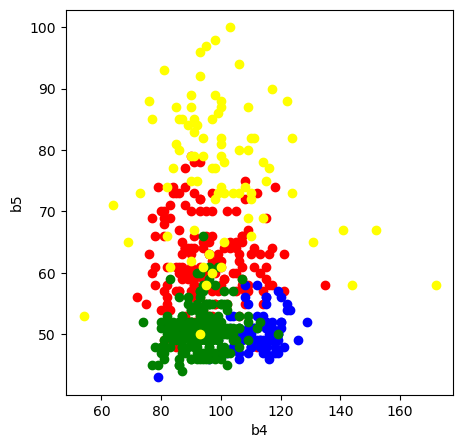

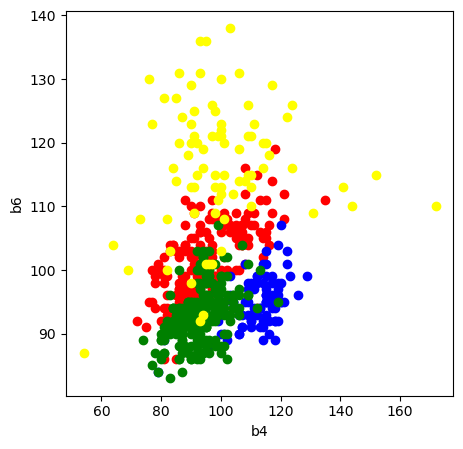

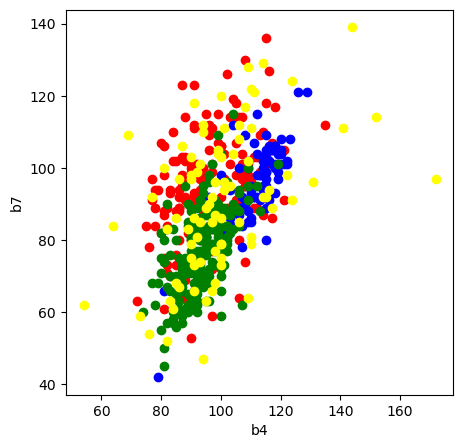

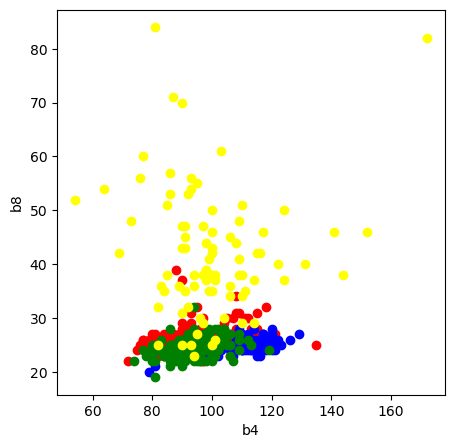

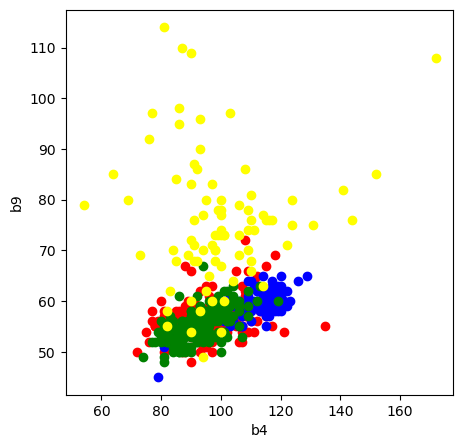

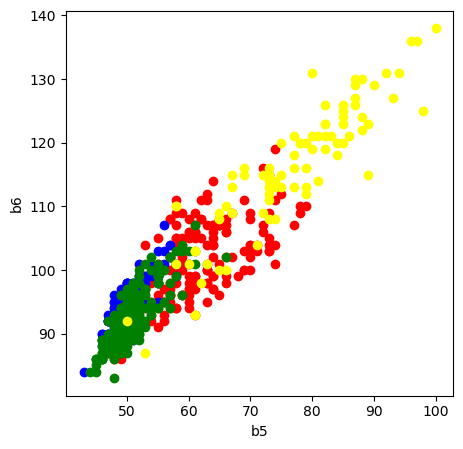

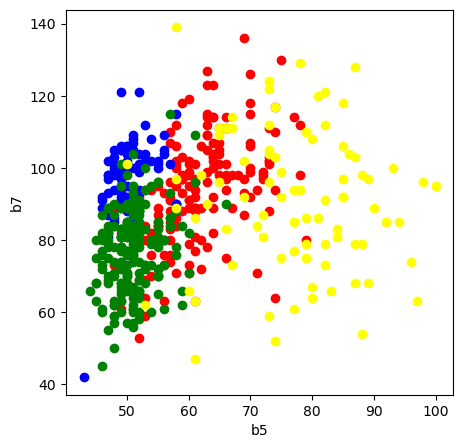

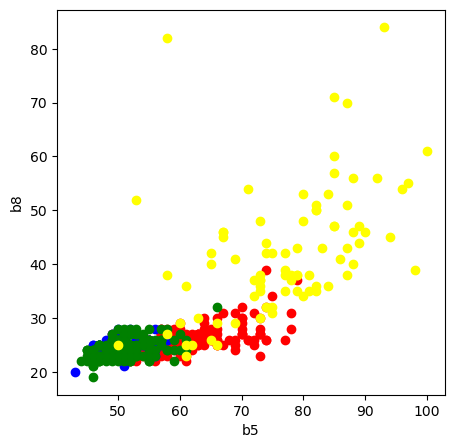

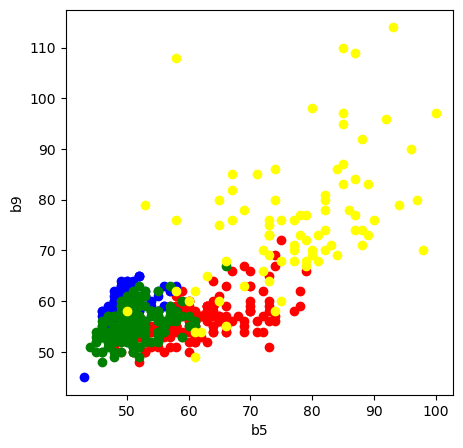

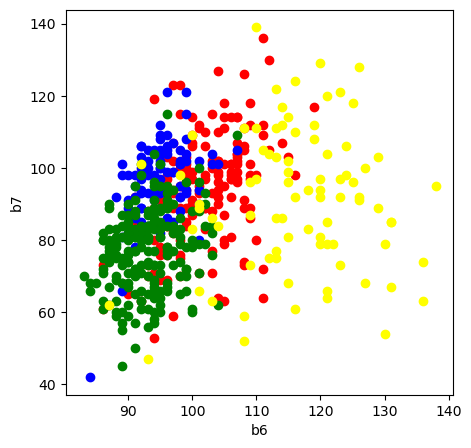

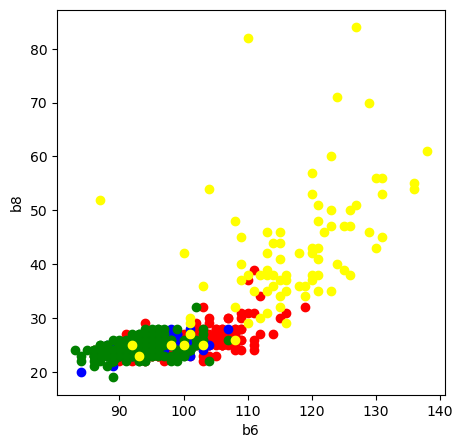

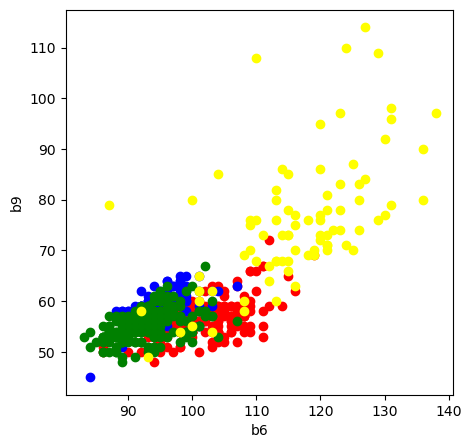

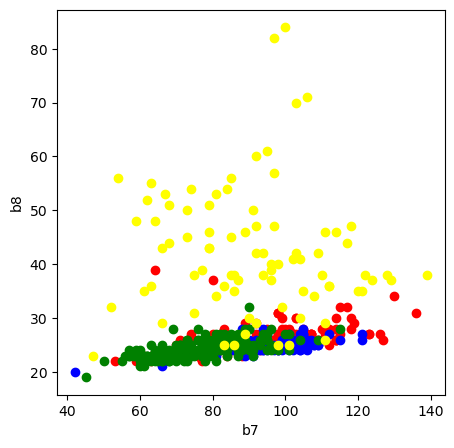

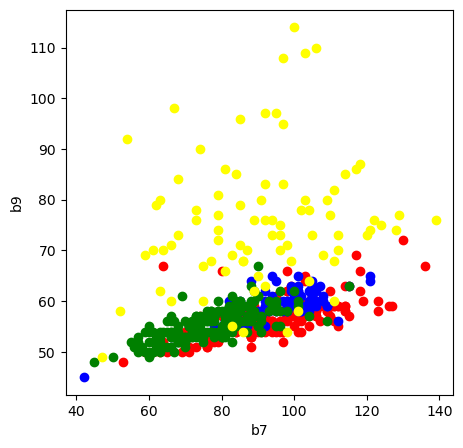

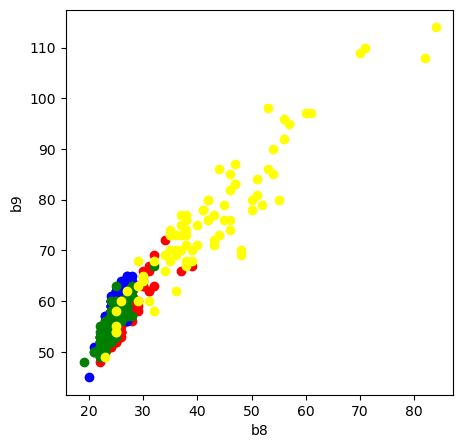

In [6]:
#visualizing the data by taking 2 features at a time and separating each forest with their corresponding colors.

color,combinations,forest_d,forest_h,forest_o,forest_s=data_partition(df)
for k in combinations:
    plt.figure(figsize=(5,5))
    plt.xlabel(col[k[0]])
    plt.ylabel(col[k[1]])
    plt.scatter(forest_d[col[k[0]]],forest_d[col[k[1]]],color=color['d'])
    plt.scatter(forest_h[col[k[0]]],forest_h[col[k[1]]],color=color['h'])
    plt.scatter(forest_s[col[k[0]]],forest_s[col[k[1]]],color=color['s'])
    plt.scatter(forest_o[col[k[0]]],forest_o[col[k[1]]],color=color['o']) 
    plt.savefig(f'F:/Matrix methods/images/data/{k[0],k[1]}')

In [ ]:
#candidates: b1b5, b1b6, ( b5b6 dependent), b2b4, b2b7, b3b4, b4b5, b4b6, b5b7
# we take : ,b1b2, b1b5, b3b4, b2b4
# we take : b3b4 ( The cluster of points in b3b4 is more closely packed without much scattering.)

# B

{'d': 'red', 'h': 'blue', 'o': 'yellow', 's': 'green'}

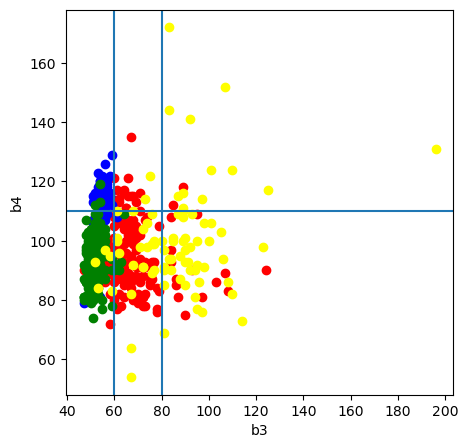

In [7]:
# create straight line segments to differentiate each cluster of points using the features b3 and b4.
plt.figure(figsize=(5,5))
plt.xlabel(col[3])
plt.ylabel(col[4])
plt.scatter(forest_d[col[3]],forest_d[col[4]],color=color['d'])
plt.scatter(forest_h[col[3]],forest_h[col[4]],color=color['h'])
plt.scatter(forest_s[col[3]],forest_s[col[4]],color=color['s'])
plt.scatter(forest_o[col[3]],forest_o[col[4]],color=color['o'])


#After visual evaluation we infer a model as,

# forest d has values between 60<b3<80 and 70<b4<120
# forest h has values between 40<b3<60 and 110<b4<130
# forest o has values between 80<b3    and 60<b4
# forest s has values between 40<b3<60 and 70<b4<110

plt.axhline(y=110)
plt.axvline(60)
plt.axvline(80)
color

In [8]:
# count the percentage of points that are correctly classified
# we calculate the ratio between number of correctly classified forests in the prediction set to the total number of values in the prediction set.

forest_d_pred=df.loc[(df['b3']>60)& (df['b3']<80) & (df['b4']>70) & (df['b4']<120) ]
forest_h_pred=df.loc[(df['b3']>40)& (df['b3']<60) & (df['b4']>110) & (df['b4']<130) ]
forest_o_pred=df.loc[(df['b3']>80)& (df['b4']>70)]
forest_s_pred=df.loc[(df['b3']>40)& (df['b3']<60) & (df['b4']>70) & (df['b4']<110) ]

correctly_classifies_forest_d=forest_d_pred.loc[forest_d_pred['class']=='d']
acc_d=correctly_classifies_forest_d.shape[0]/forest_d_pred.shape[0]
print("accuracy in forest_d classifier : ",acc_d)

correctly_classifies_forest_h=forest_h_pred.loc[forest_h_pred['class']=='h']
acc_h=correctly_classifies_forest_h.shape[0]/forest_h_pred.shape[0]

print("accuracy in forest_h classifier : ",acc_h)

correctly_classifies_forest_o=forest_o_pred.loc[forest_o_pred['class']=='o']
acc_o=correctly_classifies_forest_o.shape[0]/forest_o_pred.shape[0]

print("accuracy in forest_o classifier : ",acc_o)

correctly_classifies_forest_s=forest_s_pred.loc[forest_s_pred['class']=='s']
acc_s=correctly_classifies_forest_s.shape[0]/forest_s_pred.shape[0]

print("accuracy in forest_s classifier : ",acc_s)

combined_accuracy=acc_d+acc_h+acc_o+acc_s
print("combined accuracy : ",combined_accuracy/4)

accuracy in forest_d classifier :  0.7833333333333333
accuracy in forest_h classifier :  0.9193548387096774
accuracy in forest_o classifier :  0.7681159420289855
accuracy in forest_s classifier :  0.7591836734693878
combined accuracy :  0.8074969468853459


# C

# SVD and projection (PCA)

In [9]:
def svd_and_projection(df):
    u,s,vt=np.linalg.svd(df[col[1:]])  # np.linalg.svd returns 3 arrays. u, sigma and v.transpose. 
    sub=vt.T[:,:2]                     # taking the transpose of v.Transpose and selecting the first 2 right singular vector.
  

    data_proj=np.dot(df[col[1:]],sub)  # projecting the data onto the subspace
    
    df_new=pd.DataFrame(np.array(data_proj),columns=['x','y'])  # creating a dataframe using the data after svd
    
    df_new['class']=df['class']     # adding back the column "class" to the data after svd operation
    return df_new
svd_and_projection(df)

,x,y,class
0,-201.288494,-2.926356,d
1,-219.110704,25.496824,h
2,-194.012422,15.324239,s
3,-194.648730,19.477215,s
4,-229.591500,0.679843,d
...,...,...,...
518,-225.857568,-26.688263,o
519,-209.808552,-6.442772,d
520,-192.757253,9.499943,s
521,-186.977176,4.597094,s


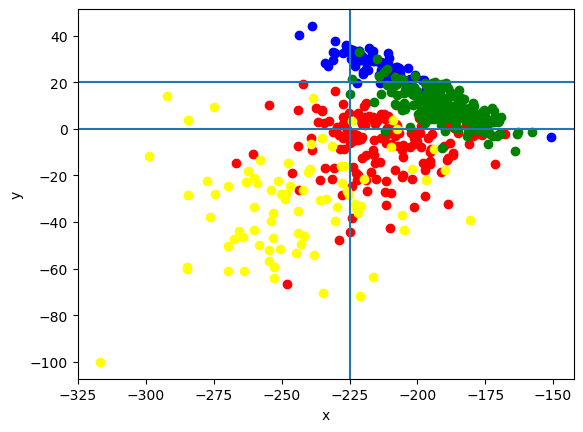

In [10]:
# plotting the data recieved after pca

color,combinations,forest_d,forest_h,forest_o,forest_s=data_partition(svd_and_projection(df))
plt.scatter(forest_d['x'],forest_d['y'],color=color['d'])
plt.scatter(forest_h['x'],forest_h['y'],color=color['h'])
plt.scatter(forest_o['x'],forest_o['y'],color=color['o'])
plt.scatter(forest_s['x'],forest_s['y'],color=color['s'])
plt.xlabel('x')
plt.ylabel('y')
plt.axvline(-225)
plt.axhline(0)
plt.axhline(20)

In [11]:
#After visual evaluation we infer a model as,

# forest d has values between -225<x and -50<y<0
# forest h has values between -225<x<-200 and y>20
# forest o has values between x<-225    and y<0
# forest s has values between x>-225and -20<y<0

df2=svd_and_projection(df)

forest_d_pred=df2.loc[(df2['x']>-225) & (df2['y']>-50) & (df2['y']<0) ]
forest_h_pred=df.loc[(df2['x']>-225)& (df2['x']<-200) &  (df2['y']>20) ]
forest_o_pred=df.loc[(df2['x']<-225)& (df2['y']<0)]
forest_s_pred=df.loc[(df2['x']>-225)& (df2['y']<20) & (df2['y']>0)]

correctly_classifies_forest_d=forest_d_pred.loc[forest_d_pred['class']=='d']
acc_d=correctly_classifies_forest_d.shape[0]/forest_d_pred.shape[0]
print("accuracy in forest_d classifier : ",acc_d)

correctly_classifies_forest_h=forest_h_pred.loc[forest_h_pred['class']=='h']
acc_h=correctly_classifies_forest_h.shape[0]/forest_h_pred.shape[0]

print("accuracy in forest_h classifier : ",acc_h)

correctly_classifies_forest_o=forest_o_pred.loc[forest_o_pred['class']=='o']
acc_o=correctly_classifies_forest_o.shape[0]/forest_o_pred.shape[0]

print("accuracy in forest_o classifier : ",acc_o)

correctly_classifies_forest_s=forest_s_pred.loc[forest_s_pred['class']=='s']
acc_s=correctly_classifies_forest_s.shape[0]/forest_s_pred.shape[0]

print("accuracy in forest_s classifier : ",acc_s)

combined_accuracy=acc_d+acc_h+acc_o+acc_s
print("combined accuracy : ",combined_accuracy/4)

accuracy in forest_d classifier :  0.7049180327868853
accuracy in forest_h classifier :  0.821917808219178
accuracy in forest_o classifier :  0.7317073170731707
accuracy in forest_s classifier :  0.782608695652174
combined accuracy :  0.7602879634328519


In [ ]:
#After svd we can see a slight decrease in the accuracy

# D

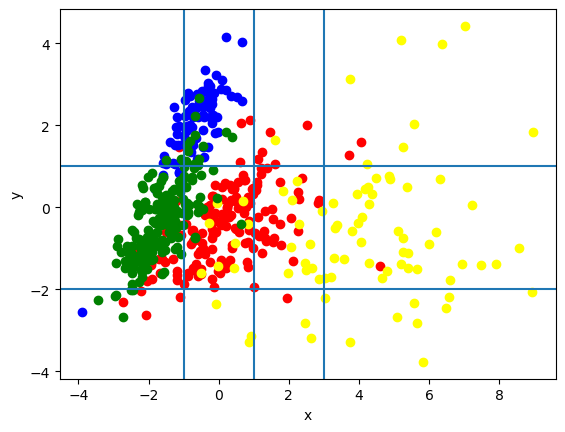

In [12]:
from sklearn.preprocessing import scale
mean_scale=scale(df[col[1:]],with_mean=True,with_std=True)    #subtracting each observation with the mean of its column
df_mean_sc=pd.DataFrame(mean_scale,columns=col[1:])
df_mean_sc['class']=df[col[0]]

color,combinations,forest_d,forest_h,forest_o,forest_s=data_partition(svd_and_projection(df_mean_sc))

plt.scatter(forest_d['x'],forest_d['y'],color=color['d'])
plt.scatter(forest_h['x'],forest_h['y'],color=color['h'])
plt.scatter(forest_o['x'],forest_o['y'],color=color['o'])
plt.scatter(forest_s['x'],forest_s['y'],color=color['s'])

plt.xlabel('x')
plt.ylabel('y')
plt.axvline(-1)
plt.axvline(3)
plt.axvline(1)
plt.axhline(-2)
plt.axhline(1)

In [13]:
#After visual evaluation we infer a model as,

# forest d has values between -1<x<3 and -2<y<1
# forest h has values between x>-1 and x<1 and y>1
# forest o has values between x>2
# forest s has values between x<0 and -2<y<2

df2=svd_and_projection(df_mean_sc)

forest_d_pred=df2.loc[(df2['x']>-1) & (df2['x']<3) & (df2['y']>-2) & (df2['y']<1) ]
forest_h_pred=df.loc[(df2['x']>-1)& (df2['x']<1) & (df2['y']>1) ]
forest_o_pred=df.loc[(df2['x']>2)]
forest_s_pred=df.loc[(df2['x']<0)& (df2['y']>-2) & (df2['y']<2)]

correctly_classifies_forest_d=forest_d_pred.loc[forest_d_pred['class']=='d']
acc_d=correctly_classifies_forest_d.shape[0]/forest_d_pred.shape[0]
print("accuracy in forest_d classifier : ",acc_d)

correctly_classifies_forest_h=forest_h_pred.loc[forest_h_pred['class']=='h']
acc_h=correctly_classifies_forest_h.shape[0]/forest_h_pred.shape[0]

print("accuracy in forest_h classifier : ",acc_h)

correctly_classifies_forest_o=forest_o_pred.loc[forest_o_pred['class']=='o']
acc_o=correctly_classifies_forest_o.shape[0]/forest_o_pred.shape[0]

print("accuracy in forest_o classifier : ",acc_o)

correctly_classifies_forest_s=forest_s_pred.loc[forest_s_pred['class']=='s']
acc_s=correctly_classifies_forest_s.shape[0]/forest_s_pred.shape[0]

print("accuracy in forest_s classifier : ",acc_s)

combined_accuracy=acc_d+acc_h+acc_o+acc_s
print("combined accuracy : ",combined_accuracy/4)

accuracy in forest_d classifier :  0.7309941520467836
accuracy in forest_h classifier :  0.7926829268292683
accuracy in forest_o classifier :  0.85
accuracy in forest_s classifier :  0.6411149825783972
combined accuracy :  0.7536980153636124


# E

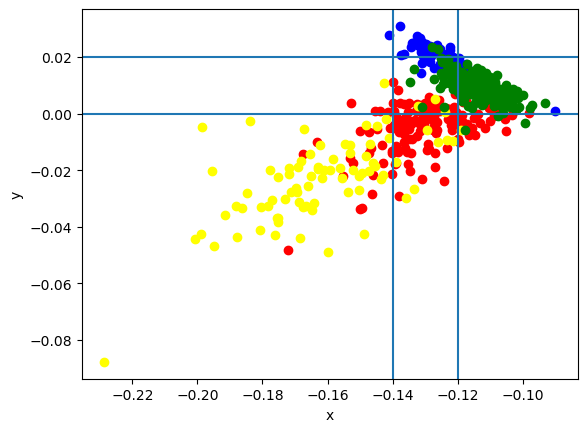

In [14]:
from sklearn.preprocessing import normalize
norm_data=normalize(df[col[1:]],axis=0, norm='l2')         # Dividing each observation with the 2-norm of its column.
df_norm=pd.DataFrame(norm_data,columns=col[1:])
df_norm['class']=df['class']

color,combinations,forest_d,forest_h,forest_o,forest_s=data_partition(svd_and_projection(df_norm))

plt.scatter(forest_d['x'],forest_d['y'],color=color['d'])
plt.scatter(forest_h['x'],forest_h['y'],color=color['h'])
plt.scatter(forest_o['x'],forest_o['y'],color=color['o'])
plt.scatter(forest_s['x'],forest_s['y'],color=color['s'])

plt.xlabel('x')
plt.ylabel('y')
plt.axvline(-0.14)

plt.axvline(-0.12)



plt.axhline(0.02)
plt.axhline(0)

In [15]:
#After visual evaluation we infer a model as,

# forest d has values between x>-0.14 and -0.02<y<0
# forest h has values between x<-0.13 and y>0.01
# forest o has values between x<-0.14 
# forest s has values between x>-0.12 and 0<y<0.2


df2=svd_and_projection(df_norm)

forest_d_pred=df2.loc[(df2['x']>-0.14)  & (df2['y']>-0.02) & (df2['y']<0) ]
forest_h_pred=df.loc[ (df2['x']<-0.13) & (df2['y']>0.01) ]
forest_o_pred=df.loc[(df2['x']<-0.14)]
forest_s_pred=df.loc[(df2['x']>-0.12)& (df2['y']>0) & (df2['y']<0.2)]

correctly_classifies_forest_d=forest_d_pred.loc[forest_d_pred['class']=='d']
acc_d=correctly_classifies_forest_d.shape[0]/forest_d_pred.shape[0]
print("accuracy in forest_d classifier : ",acc_d)

correctly_classifies_forest_h=forest_h_pred.loc[forest_h_pred['class']=='h']
acc_h=correctly_classifies_forest_h.shape[0]/forest_h_pred.shape[0]

print("accuracy in forest_h classifier : ",acc_h)

correctly_classifies_forest_o=forest_o_pred.loc[forest_o_pred['class']=='o']
acc_o=correctly_classifies_forest_o.shape[0]/forest_o_pred.shape[0]

print("accuracy in forest_o classifier : ",acc_o)

correctly_classifies_forest_s=forest_s_pred.loc[forest_s_pred['class']=='s']
acc_s=correctly_classifies_forest_s.shape[0]/forest_s_pred.shape[0]

print("accuracy in forest_s classifier : ",acc_s)

combined_accuracy=acc_d+acc_h+acc_o+acc_s
print("combined accuracy : ",combined_accuracy/4)

accuracy in forest_d classifier :  0.8977272727272727
accuracy in forest_h classifier :  0.84
accuracy in forest_o classifier :  0.7319587628865979
accuracy in forest_s classifier :  0.8571428571428571
combined accuracy :  0.831707223189182


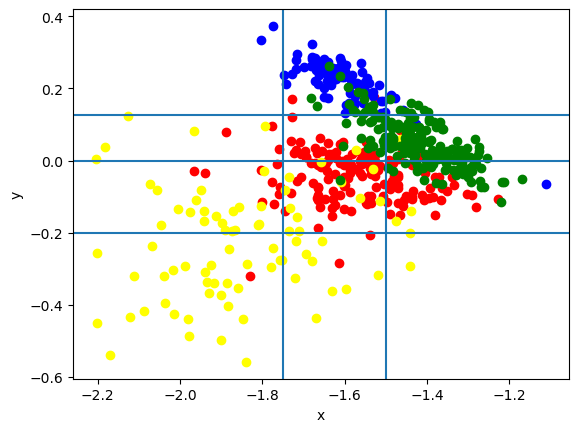

In [20]:
norm_data=normalize(df[col[1:]],axis=0, norm='max')         # Dividing each observation with the max-norm of its column.
df_norm=pd.DataFrame(norm_data,columns=col[1:])
df_norm['class']=df['class']

color,combinations,forest_d,forest_h,forest_o,forest_s=data_partition(svd_and_projection(df_norm))


plt.scatter(forest_d['x'],forest_d['y'],color=color['d'])
plt.scatter(forest_h['x'],forest_h['y'],color=color['h'])
plt.scatter(forest_o['x'],forest_o['y'],color=color['o'])
plt.scatter(forest_s['x'],forest_s['y'],color=color['s'])

plt.xlabel('x')
plt.ylabel('y')

### 2-norm###############

#plt.axvline(-0.14)
#plt.axvline(-0.12)
#plt.axhline(0.02)
#plt.axhline(0)

################max-norm#############
plt.axvline(-1.5)
plt.axvline(-1.75)
plt.axhline(0.125)
plt.axhline(-0)
plt.axhline(-0.2)

In [21]:
#After visual evaluation we infer a model as,

# forest d has values between x>-0.14 and -0.02<y<0
# forest h has values between x<-0.13 and y>0.01
# forest o has values between x<-0.14 
# forest s has values between x>-0.12 and 0<y<0.2


#df2=svd_and_projection(df_norm)

#forest_d_pred=df2.loc[(df2['x']>-0.14)  & (df2['y']>-0.02) & (df2['y']<0) ]
#forest_h_pred=df.loc[ (df2['x']<-0.13) & (df2['y']>0.01) ]
#forest_o_pred=df.loc[(df2['x']<-0.14)]
#forest_s_pred=df.loc[(df2['x']>-0.12)& (df2['y']>0) & (df2['y']<0.2)]

# forest d has values between x>-0.18 and -0.2<y<0.125
# forest h has values between x<-0.175 and y>0.125
# forest o has values between x<-0.175 and y <0
# forest s has values between x>-1.5 and y>0


df_max=svd_and_projection(df_norm)

forest_d_pred=df_max.loc[(df_max['x']>-1.8)& (df_max['x']<-1.75)  & (df_max['y']>-0.2) & (df_max['y']<0.125) ]
forest_h_pred=df.loc[ (df_max['x']<-1.75) & (df_max['y']>0.125) & (df_max['y'] > -1.5)]
forest_o_pred=df.loc[(df_max['x']<-1.75)&(df_max['y']< 0)]
forest_s_pred=df.loc[(df_max['x']>-1.5)& (df_max['y']>0)]

correctly_classifies_forest_d=forest_d_pred.loc[forest_d_pred['class']=='d']
acc_d=correctly_classifies_forest_d.shape[0]/forest_d_pred.shape[0]
print("accuracy in forest_d classifier : ",acc_d)

correctly_classifies_forest_h=forest_h_pred.loc[forest_h_pred['class']=='h']
acc_h=correctly_classifies_forest_h.shape[0]/forest_h_pred.shape[0]

print("accuracy in forest_h classifier : ",acc_h)

correctly_classifies_forest_o=forest_o_pred.loc[forest_o_pred['class']=='o']
acc_o=correctly_classifies_forest_o.shape[0]/forest_o_pred.shape[0]

print("accuracy in forest_o classifier : ",acc_o)

correctly_classifies_forest_s=forest_s_pred.loc[forest_s_pred['class']=='s']
acc_s=correctly_classifies_forest_s.shape[0]/forest_s_pred.shape[0]

print("accuracy in forest_s classifier : ",acc_s)

combined_accuracy=acc_d+acc_h+acc_o+acc_s
print("combined accuracy : ",combined_accuracy/4)

accuracy in forest_d classifier :  0.7777777777777778
accuracy in forest_h classifier :  1.0
accuracy in forest_o classifier :  0.8387096774193549
accuracy in forest_s classifier :  0.890625
combined accuracy :  0.8767781137992832


In [18]:
color

{'d': 'red', 'h': 'blue', 'o': 'yellow', 's': 'green'}